In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

<div dir='rtl'>
    از توابع زیر برای خواندن و ذخیره کردن تصاویر سیاه سفید استفاده می‌شود.
</div>

In [2]:
def read_gray_img(path):
    img = Image.open(path).convert('L')
    return np.array(img, dtype=np.uint8)

def save_gray_img(img, path):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.savefig(path, dpi=600)

<div dir='rtl'>
    تابع کانولوشن 2 بعدی را در زیر تکمیل کنید. پیاده سازی باید توسط خودتان انجام شده باشد و استفاده از توابع آماده مجاز نیست. برای سادگی میتوانید فرض کنید اندازه هسته (kernel) همیشه 3 در 3 است و تصویر ورودی سیاه سفید می‌باشد. همچنین به تصویر داده شده باید zero padding اضافه کنید تا تصویر خروجی اندازه برابر با تصویر ورودی پیدا کند. ورودی‌ها و خروجی تابع آرایه دو بعدی numpy هستند.
</div>

In [3]:
def convolution2d(image, kernel):

  image = np.array(image, dtype=float)
  result = []
  inverseKernel = kernel

  # First we filip the first and last row and then first and last column:
  inverseKernel[[2, 0]] = kernel[[0, 2]]

  # Now we filip the first and last column:
  inverseKernel[:, [2, 0]] = kernel[:, [0, 2]]  

  # We have generated inverse of our kernel by those operations.

  ############################################################################################################################################################################

  # Now we do zero padding, in general for odd n, we need to add (n-1)/2 zeroes, but since our dimentions are fixed and 3*3, we just add 1 layer of zeroe's to our picture.
  hPadding = np.zeros((image.shape[0]+2, 1)).T # This +2 is because we first zero pad vertically and that adds 2 extra elements to all horizantally.
  vPadding = np.zeros((image.shape[1], 1))

  zeroPaddedImage = np.hstack([vPadding, image, vPadding])
  zeroPaddedImage = np.vstack((hPadding, zeroPaddedImage, hPadding))

  ############################################################################################################################################################################

  # Now that we have inversed our kernel and zeropadded our image, we perform the convolution.
  for i in range(image.shape[0]):
    result.append([])
    for j in range(image.shape[1]):
      batch = zeroPaddedImage[i:i+3, j:j+3]
      result[i].append(np.sum(np.multiply(batch, inverseKernel)))
  return result


<div dir='rtl'>
    در سلول زیر تصویر مورد نظر بارگذاری شده و هسته‌های مختلف برای کانولوشن تعریف شده است.
</div>

In [4]:
image = read_gray_img('./gray.png')

kernel1 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=float)

kernel2 = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=float)

kernel3 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
], dtype=float)

kernel4 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=float)

kernel5 = 1/2 * np.array([
    [0, 0, 1],
    [0, 0, 0],
    [1, 0, 0]
], dtype=float)

<div dir='rtl'>
    با تکمیل تابع کانولوشن در بالا، کد زیر باید به درستی عمل کانولوشن را برای هر هسته انجام داده و تصاویر حاصل را در فایل‌های مختلف ذخیره کند.
</div>

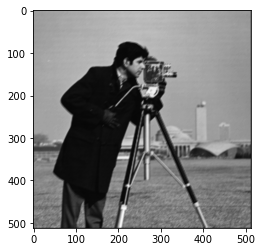

In [5]:
for i, kernel in enumerate([kernel1, kernel2, kernel3, kernel4, kernel5]):
    conv = convolution2d(image, kernel)
    save_gray_img(conv, str(i+1) + ".png")

<div dir='rtl'>
    سلول زیر نیز دو مرحله عمل کانولوشن را روی تصویر اصلی اعمال و ذخیره می‌کند.
</div>

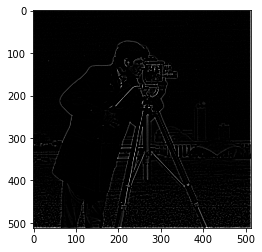

In [6]:
conv = convolution2d(image, kernel2)
conv = convolution2d(conv, kernel4)
save_gray_img(conv, "6.png")

<div dir='rtl'>
    در سلول پایین برای هر تصویر به دست آمده در مراحل بالا تشریح کنید که چه اتفاقی افتاده است و فیلترها (هسته‌ها)ی کانولوشن چه عملی روی تصویر انجام می‌دهند. پاسخ‌تان را توجیه کنید.
</div>

<div dir='rtl'>
هسته اول:

همانطور که از تعریف آن هم مشخص است(همین‌که عضو وسطی آن یک است و بقیه اعضای آن صفر) طی  انجام عمل کانولوشن هیچ تاثیری روی وردی نمیگذارد و همان را به‌عنوان خروجی برمی‌گرداند.

هسته دوم:

مجددا با دیدن تعریف این هسته، میبینیم که علاوه بر همان پیکسل، پیکسل های کناری را هم دخیل میکند و از آنها میانگین می‌گیرد، این باعث میشود لبه های تصویر(منظور از لبه، لبه هریک از اشیا و اجسام داخل تصویر است.) کمرنگ‌تر شوند یا از بین بروند و یعنی تصویر مات‌تر و یکنواخت‌تر میشود، به این جلوه، بلور نیز گفته میشود.

همچنین این هسته با این جلوه باعث میشود نویز های تصویر حذف شوند یا تاثیرشان کمتر شود.
این فیلتر، به فیلتر lowpass معروف است.

هسته سوم:

این هسته کاملا برعکس هسته قبلی عمل می‌کند چون تاثیر هر پیکسل را از پیکسل های کناری بسیار جدا میکند، منظور من این است که لبه‌هارا مشخص تر میکند، اگر به لباس شخص توجه کنید، می‌بینید حاشیه لباس آن یک خط  سفید کشیده شده که این موضوع حرف من را تصدیق میکند، درواقع وضوح تصویر طی این هسته زیاد تر شده، به این جلوه شارپ شدن گفته میشود.
        همچنین این فیلتر، از جمع فیلتر ۱ با ۳ بدست آمده که یعنی خود عکس را داریم و لبه ها واضح‌تر شده‌اند.

هسته چهارم:

این هسته همان‌طور که از خروجی تصویر آن واضح است، لبه هارا مشخص می‌کند و بخش های غیر لبه را بخاطر شبیه بودن مقداری آنها سیاه میکند.(جمع درایه ها برابر 0 است بنابراین انتظار میرود به ازای ورودی های مشابه عدد صفر یعنی یک پیکسل سیاه خروجی داده شود)

هسته پنجم:

این هسته میانگین پیکسل های بالا-راست و پایین-چپ را میگیرد و بجای پیکسل اصلی قرار میدهد(توجه کنید کرنل را قبل عملیات اینورس میکنیم اما اینورس این ماتریس خودش است) این مانند آن است که تصویر را حین حرکت گرفته باشیم، و این جلوه نیز به‌نوعی یک بلور است که در طی حرکت بدست آمده.

عکس ششم:

این عکس ابتدا به هسته دوم داده شده و خروجی آن که یک عکس با لبه‌های صاف‌تر و یا به اصطلاع، با نویز کمتر است، به هسته چهارم برای یافتن لبه‌های آن داده شده است، که در انتها در تصویر خروجی لبه‌های عکس مشخص هستند اما نویز این عکس به نسبت عکس خروجی چهارم کمتر شده و یعنی اطلاعات ارزشمند‌تر را نگه‌داشته و اطلاعات کم‌ارزش‌تر و یا جزئیات را حذف/کم‌رنگ‌تر کرده.

</div>